<a href="https://colab.research.google.com/github/Nevil844/cartoon-effect-on-image-opencv/blob/main/cartoon_effect_on_image_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def cartoonify(ImagePath):
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
# check if the image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()
    ReSized1 = cv2.resize(originalmage, (960, 540))
    grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 540))
#applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
#retrieving the edges for cartoon effect
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255,
      cv2.ADAPTIVE_THRESH_MEAN_C,
      cv2.THRESH_BINARY, 9, 9)
    ReSized4 = cv2.resize(getEdge, (960, 540))
#applying bilateral filter to remove noise
    #and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (960, 540))
    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
    ReSized6 = cv2.resize(cartoonImage, (960, 540))

#Plotting the whole transition
    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
    plt.show()

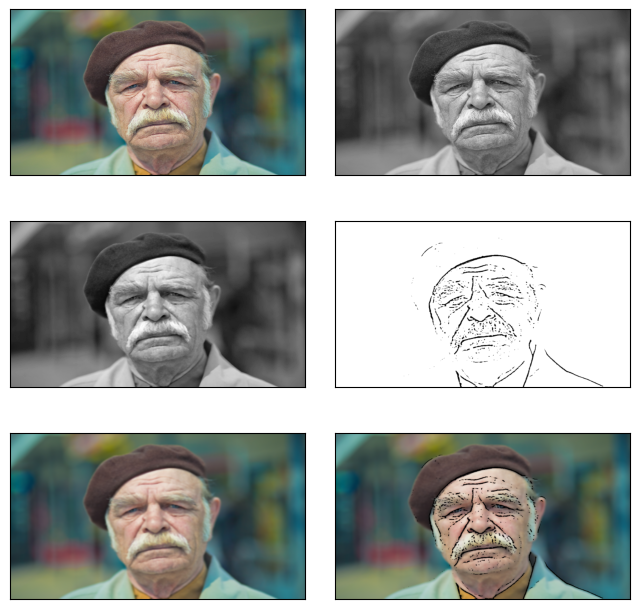

In [ ]:
cartoonify('image1.jpg')

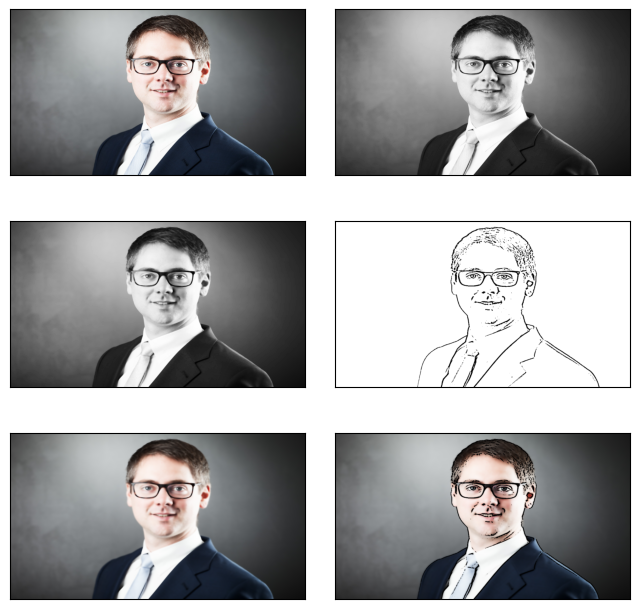

In [ ]:
cartoonify('image2.jpg')

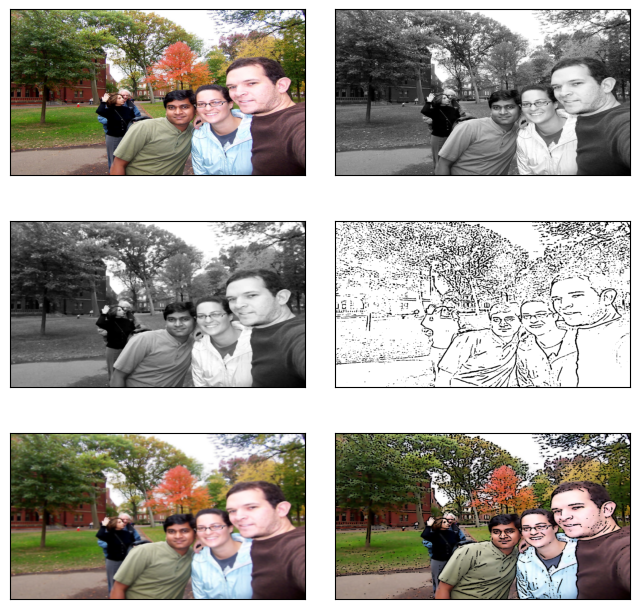

In [ ]:
cartoonify('image3.jpg')

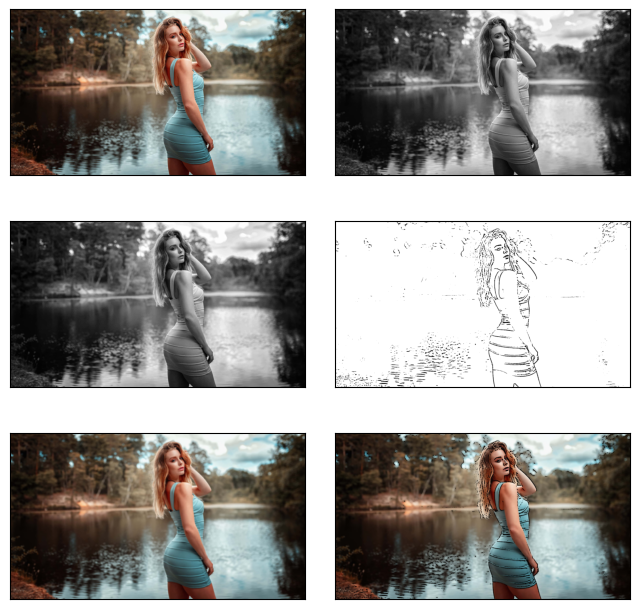

In [ ]:
cartoonify('image4.jpg')

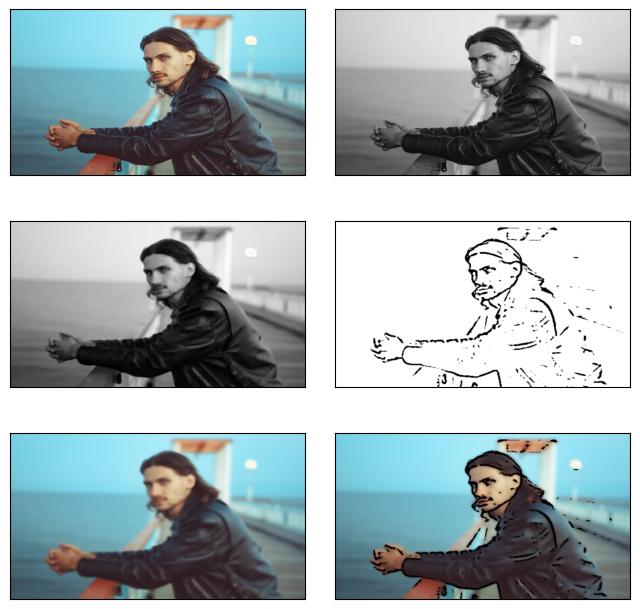

In [ ]:
cartoonify('image5.jpg')